- https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt

In [4]:
test = data.DataReader(['TSLA', 'FB'], 'stooq', start='2018/01/01', end='2019/12/31')
test.head()

Attributes   Close            High             Low             Open           \
Symbols       TSLA      FB    TSLA      FB    TSLA       FB    TSLA       FB   
Date                                                                           
2019-12-31  83.666  205.25  84.258  205.56  80.416  203.600  81.000  203.995   
2019-12-30  82.940  204.41  85.800  207.90  81.852  203.900  85.758  207.860   
2019-12-27  86.076  208.10  87.062  208.93  85.222  206.588  87.000  208.670   
2019-12-26  86.188  207.79  86.696  207.82  85.270  205.310  85.582  205.567   
2019-12-24  85.050  205.12  85.094  206.79  82.538  205.000  83.672  206.300   

Attributes    Volume            
Symbols         TSLA        FB  
Date                            
2019-12-31  51462280   8962756  
2019-12-30  63006325  10534441  
2019-12-27  49784135  10287634  
2019-12-26  53241445   9368273  
2019-12-24  40273600   6046273

In [5]:
test = test['Close']
test.head()

Symbols,TSLA,FB
Date,,
2019-12-31,83.666,205.25
2019-12-30,82.940,204.41
2019-12-27,86.076,208.10
2019-12-26,86.188,207.79
2019-12-24,85.050,205.12


In [6]:
tesla = test['TSLA'].pct_change().apply(lambda x: np.log(1+x))
tesla.head()

Date
2019-12-31         NaN
2019-12-30   -0.008715
2019-12-27    0.037113
2019-12-26    0.001300
2019-12-24   -0.013292
Name: TSLA, dtype: float64

In [7]:
var_tesla = tesla.var()
var_tesla

0.0011483441310319099

In [8]:
fb = test['FB'].pct_change().apply(lambda x: np.log(1+x))
fb.head()

Date
2019-12-31         NaN
2019-12-30   -0.004101
2019-12-27    0.017891
2019-12-26   -0.001491
2019-12-24   -0.012933
Name: FB, dtype: float64

In [9]:
var_fb = fb.var()
var_fb

0.00045694252779501906

In [10]:
tesla_vol = np.sqrt(var_tesla * 250)
fb_vol = np.sqrt(var_fb * 250)
tesla_vol, fb_vol

(0.5358040992358843, 0.3379876209992827)

<AxesSubplot:xlabel='Symbols'>

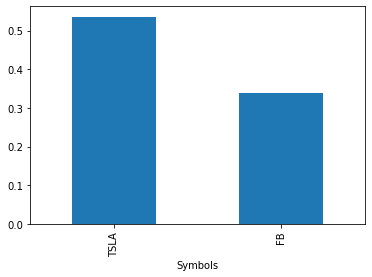

In [11]:
test.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')

In [12]:
test1 = test.pct_change().apply(lambda x: np.log(1+x))
test1.head()

Symbols,TSLA,FB
Date,,
2019-12-31,NaN,NaN
2019-12-30,-0.008715,-0.004101
2019-12-27,0.037113,0.017891
2019-12-26,0.001300,-0.001491
2019-12-24,-0.013292,-0.012933


In [13]:
test1['TSLA'].cov(test1['FB'])

0.00018252211228761701

In [14]:
test1['TSLA'].corr(test1['FB'])

0.25196990289769977

In [15]:
test2 = test.pct_change().apply(lambda x: np.log(1+x))
test2.head()

Symbols,TSLA,FB
Date,,
2019-12-31,NaN,NaN
2019-12-30,-0.008715,-0.004101
2019-12-27,0.037113,0.017891
2019-12-26,0.001300,-0.001491
2019-12-24,-0.013292,-0.012933


In [16]:
w = [0.2, 0.8]
e_r_ind = test2.mean()
e_r_ind

Symbols
TSLA   -0.000530
FB     -0.000246
dtype: float64

In [17]:
e_r = (e_r_ind*w).sum()
e_r

-0.00030276915203075055

In [18]:
df = data.DataReader(['AAPL', 'NKE', 'GOOGL', 'AMZN'], 'stooq', start='2015/01/01', end='2019/12/31')
df.head()

Attributes   Close                               High                    \
Symbols       AAPL      NKE    GOOGL     AMZN    AAPL      NKE    GOOGL   
Date                                                                      
2019-12-31  72.441   99.810  1339.39  1847.84  72.448   99.890  1340.66   
2019-12-30  71.917   99.295  1339.71  1846.89  72.208  100.090  1357.00   
2019-12-27  71.492  100.050  1354.64  1869.80  72.521  100.270  1367.07   
2019-12-26  71.520   99.205  1362.47  1868.77  71.538   99.245  1363.20   
2019-12-24  70.129   98.637  1344.43  1789.21  70.283   99.156  1352.01   

Attributes              Low                              Open           \
Symbols        AMZN    AAPL     NKE    GOOGL     AMZN    AAPL      NKE   
Date                                                                     
2019-12-31  1853.26  71.423  99.005  1332.13  1832.23  71.525   99.075   
2019-12-30  1884.00  70.363  98.955  1337.84  1840.62  71.409  100.020   
2019-12-27  1901.40  71.078  99.486  1353.00  1866.01  71.820   99.496   
2019-12-26  1870.46  70.237  98.607  1345.51  1799.50  70.266   98.835   
2019-12-24  1795.57  69.795  98.262  1344.17  1787.58  70.234   98.331   

Attributes                       Volume                             
Symbols       GOOGL     AMZN       AAPL      NKE    GOOGL     AMZN  
Date                                                                
2019-12-31  1335.79  1842.00  102341259  3262956   976061  2510380  
2019-12-30  1356.81  1874.00  146167662  3549407  1000592  3677306  
2019-12-27  1364.00  1882.92  148329485  5388782  1160873  6188754  
2019-12-26  1346.55  1801.01   94584397  3767160  1183800  6024608  
2019-12-24  1350.21  1793.81   49127265  3378811   673410   881337

In [19]:
df = df['Close']
df.head()

Symbols,AAPL,NKE,GOOGL,AMZN
Date,,,,
2019-12-31,72.441,99.810,1339.39,1847.84
2019-12-30,71.917,99.295,1339.71,1846.89
2019-12-27,71.492,100.050,1354.64,1869.80
2019-12-26,71.520,99.205,1362.47,1868.77
2019-12-24,70.129,98.637,1344.43,1789.21


In [20]:
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,AAPL,NKE,GOOGL,AMZN
Symbols,,,,
AAPL,0.000245,0.000083,0.000122,0.000142
NKE,0.000083,0.000218,0.000085,0.000092
GOOGL,0.000122,0.000085,0.000222,0.000176
AMZN,0.000142,0.000092,0.000176,0.000333


In [21]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,AAPL,NKE,GOOGL,AMZN
Symbols,,,,
AAPL,1.000000,0.359841,0.523610,0.495162
NKE,0.359841,1.000000,0.386252,0.339949
GOOGL,0.523610,0.386252,1.000000,0.647890
AMZN,0.495162,0.339949,0.647890,1.000000


In [22]:
w = {'AAPL': 0.1, 'NKE': 0.2, 'GOOGL': 0.5, 'AMZN': 0.2}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.0001606719185950198

In [23]:
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

Symbols
AAPL     0.361202
NKE      0.162482
GOOGL    0.155401
AMZN     0.295903
dtype: float64

In [24]:
w = [0.1, 0.2, 0.5, 0.2]
port_er = (w*ind_er).sum()
port_er

0.20549806027025921

In [25]:
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
AAPL     0.247627
NKE      0.233645
GOOGL    0.235371
AMZN     0.288687
dtype: float64

In [26]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
AAPL,0.361202,0.247627
NKE,0.162482,0.233645
GOOGL,0.155401,0.235371
AMZN,0.295903,0.288687


In [27]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [28]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [29]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [30]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,AAPL weight,NKE weight,GOOGL weight,AMZN weight
0,0.187843,0.189721,0.088180,0.472073,0.361802,0.077945
1,0.230753,0.189603,0.215811,0.373611,0.209216,0.201362
2,0.246191,0.214929,0.165225,0.082857,0.351929,0.399990
3,0.248169,0.194783,0.318028,0.191452,0.305744,0.184775
4,0.236235,0.196539,0.223777,0.203050,0.335866,0.237307


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

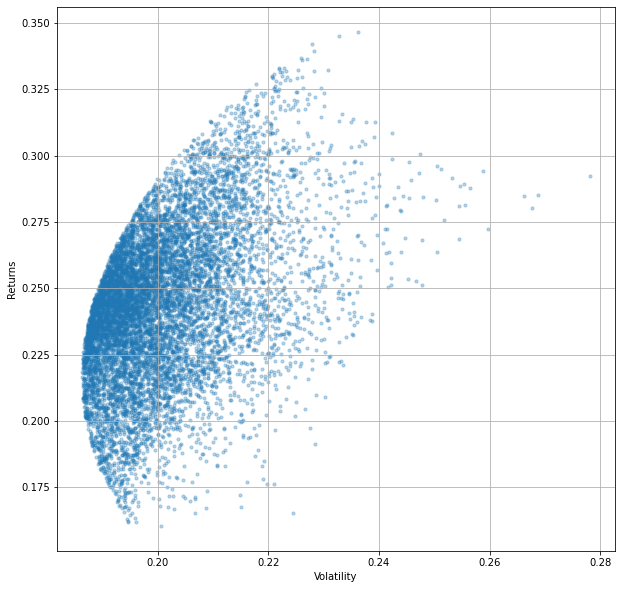

In [31]:
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [32]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns         0.216668
Volatility      0.186342
AAPL weight     0.267870
NKE weight      0.404156
GOOGL weight    0.304653
AMZN weight     0.023321
Name: 1044, dtype: float64

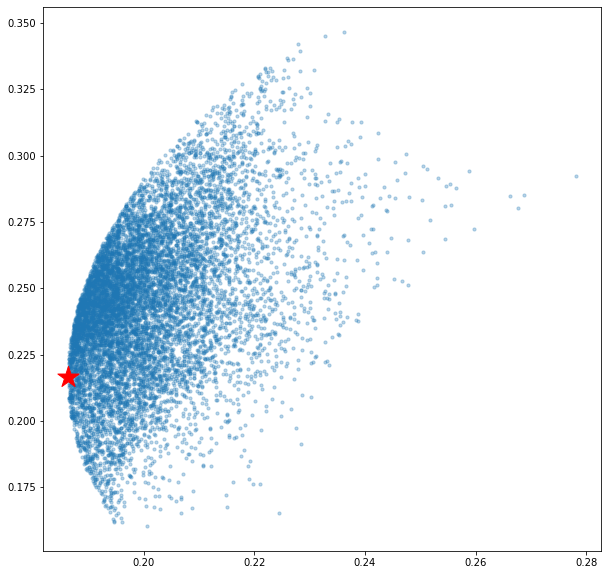

In [33]:
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [34]:
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.342029
Volatility      0.227893
AAPL weight     0.750959
NKE weight      0.020310
GOOGL weight    0.001432
AMZN weight     0.227299
Name: 6001, dtype: float64

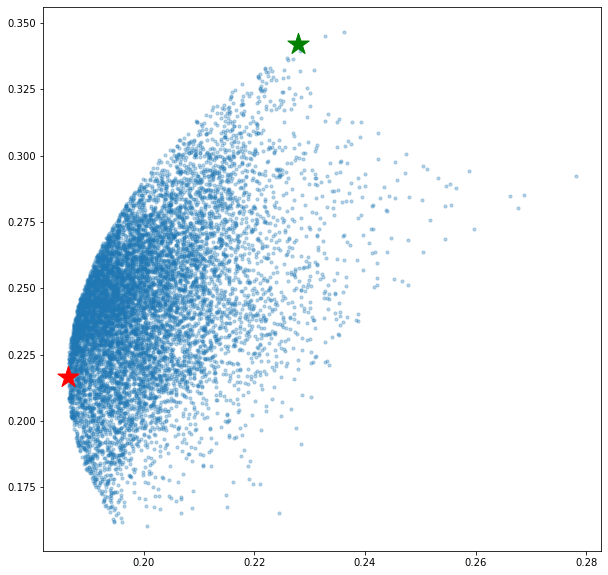

In [35]:
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)